## Square foot price analysis

In [25]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt
from itertools import groupby
from sklearn.linear_model import LinearRegression

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales_ft_adj.csv")
print(sales_frame.head())
#print(len(sales_frame))

# Adjusting Sale Price manually
sales_frame_adj = sales_frame[sales_frame["SALE PRICE"] > 0]
#print(len(sales_frame_adj))

# Adjusting for GSF > 0
sales_frame_gsf_adj = sales_frame_adj[sales_frame_adj["GROSS SQUARE FEET"] > 0]
print(len(sales_frame_gsf_adj))

     BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                                  C2   
1                    2    399   26                                  C7   
2                    2    399   39                                  C7   
3                   2B    402   21                                  C4   
4                   2A    404   55                                  C2   

                  ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
0            153 AVENUE B   

## Price per square foot (from GSF)

In [26]:
sales_frame_gsf_adj["PRICE PER SQUARE FOOT"] = sales_frame_gsf_adj["SALE PRICE"] / sales_frame_gsf_adj["GROSS SQUARE FEET"]
sales_frame_gsf_adj.reset_index(drop=True, inplace=True)
#print(sales_frame_gsf_adj)

ppsm_mean = sales_frame_gsf_adj["PRICE PER SQUARE FOOT"].mean()
print("The average price per square foot in New York is $", round(ppsm_mean), " per square meter.", sep="")

The average price per square foot in New York is $4416 per square meter.


C:\Users\Dome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Price per square meter per borough (GSF)

         BOROUGH  AVERAGE PRICE PER SQUARE METER
1      Manhattan                    11155.729055
2         Queens                     5087.443774
4      The Bronx                     4327.625079
3  Staten Island                     3386.440099
0       Brooklyn                     2588.069218


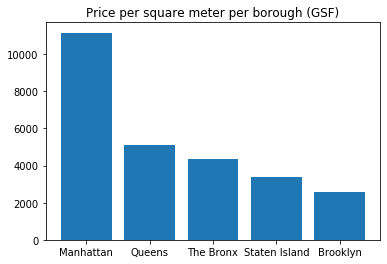

In [27]:
sales_frame_gsf_adj_grouped = sales_frame_gsf_adj.groupby(["BOROUGH"])
sales_frame_gsf_adj_grouped_gsf = sales_frame_gsf_adj_grouped["PRICE PER SQUARE FOOT"].mean().reset_index(name ="AVERAGE PRICE PER SQUARE METER")
sales_frame_gsf_adj_grouped_gsf = sales_frame_gsf_adj_grouped_gsf.sort_values(by=["AVERAGE PRICE PER SQUARE METER"], ascending=False)
print(sales_frame_gsf_adj_grouped_gsf)

# plotting price per square meter (GSF)
xs = sales_frame_gsf_adj_grouped_gsf["BOROUGH"]
ys = sales_frame_gsf_adj_grouped_gsf["AVERAGE PRICE PER SQUARE METER"]

plt.bar(xs, ys)
plt.title("Price per square meter per borough (GSF)")
plt.savefig("data/Price per square meter per borough (GSF).jpg", bbox_inches="tight")
plt.show()

## Price per square foot (from LSF)

In [28]:
sales_frame_adj["PRICE PER SQUARE FOOT"] = sales_frame_adj["SALE PRICE"] / sales_frame_adj["LAND SQUARE FEET"]
sales_frame_adj.reset_index(drop=True, inplace=True)
print(sales_frame_adj)

pplm_mean = sales_frame_adj["PRICE PER SQUARE FOOT"].mean()
print("The average price per square foot in New York is $", round(pplm_mean), " per square meter.", sep="")

             BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
1          Manhattan  ALPHABET CITY   
2          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
...              ...            ...   
30368  Staten Island        WOODROW   
30369  Staten Island        WOODROW   
30370  Staten Island        WOODROW   
30371  Staten Island        WOODROW   
30372  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                2B   
2      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ...                  ...   
30368 

C:\Users\Dome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Price per square meter per borough (LSF)

         BOROUGH  AVERAGE PRICE PER SQUARE METER
1      Manhattan                    36455.736356
2         Queens                     5586.539827
4      The Bronx                     2821.750938
0       Brooklyn                     2415.520470
3  Staten Island                     1767.862682


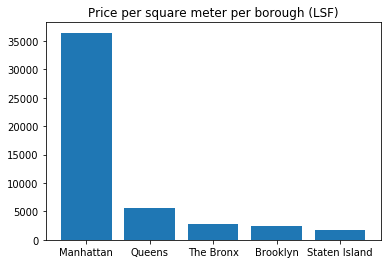

In [29]:
sales_frame_adj_grouped = sales_frame_adj.groupby(["BOROUGH"])
sales_frame_adj_grouped_lsf = sales_frame_adj_grouped["PRICE PER SQUARE FOOT"].mean().reset_index(name ="AVERAGE PRICE PER SQUARE METER")
sales_frame_adj_grouped_lsf = sales_frame_adj_grouped_lsf.sort_values(by=["AVERAGE PRICE PER SQUARE METER"], ascending=False)
print(sales_frame_adj_grouped_lsf)

# plotting price per square meter (LSF)
xq = sales_frame_adj_grouped_lsf["BOROUGH"]
yq = sales_frame_adj_grouped_lsf["AVERAGE PRICE PER SQUARE METER"]

plt.bar(xq, yq)
plt.title("Price per square meter per borough (LSF)")
plt.savefig("data/Price per square meter per borough (LSF).jpg", bbox_inches="tight")
plt.show()

## What are the expensive Neighborhoods in Manhattan (LSF)

                 NEIGHBORHOOD  AVERAGE PRICE PER SQUARE METER
0                   FINANCIAL                   136973.326577
1                 MIDTOWN CBD                   134590.879228
2                CIVIC CENTER                   119457.792226
3                     FASHION                    98846.293124
4                     TRIBECA                    84806.207012
5                        SOHO                    65772.521599
6                LITTLE ITALY                    65400.822758
7   GREENWICH VILLAGE-CENTRAL                    62568.640006
8     UPPER EAST SIDE (59-79)                    61654.704775
9                    FLATIRON                    60524.074928
10                SOUTHBRIDGE                    58768.501716
11                   KIPS BAY                    54089.492946
12            LOWER EAST SIDE                    53239.645598
13     GREENWICH VILLAGE-WEST                    52900.583133
14                   GRAMERCY                    51735.635798
15      

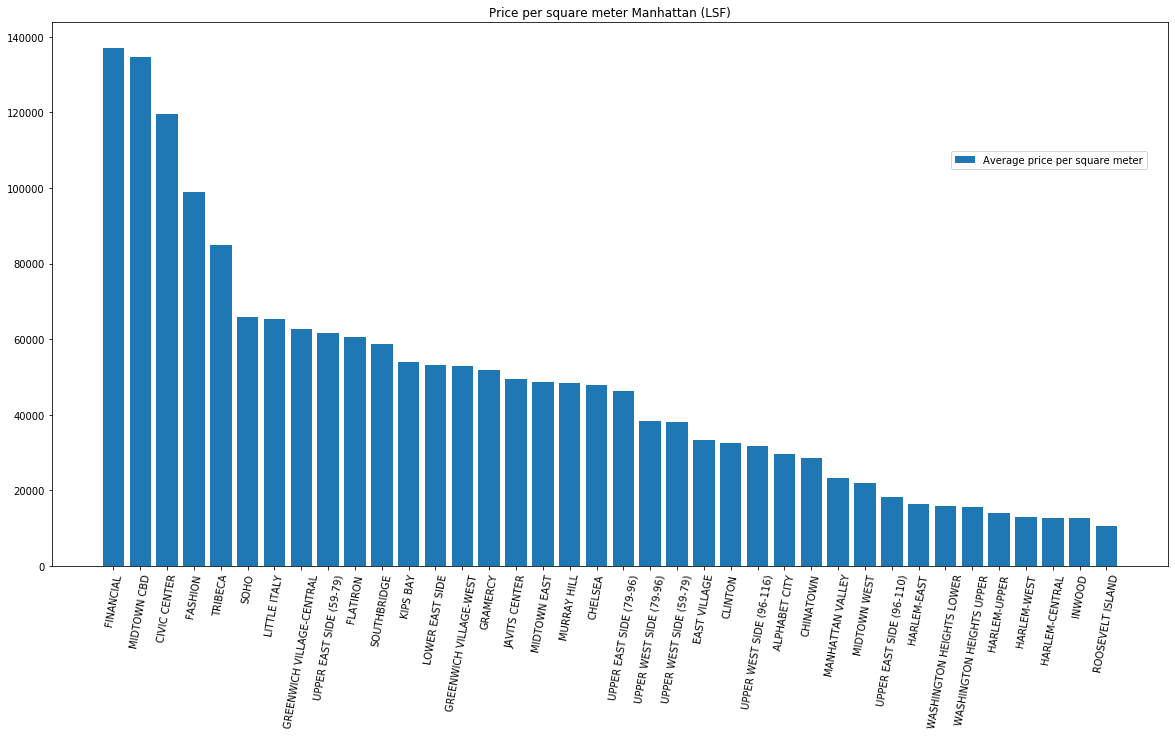

In [30]:
sales_frame_manhattan = sales_frame_adj[sales_frame_adj["BOROUGH"] == "Manhattan"]
sales_frame_man_grouped = sales_frame_manhattan.groupby(["NEIGHBORHOOD"])
sales_frame_man_grouped_lsf = sales_frame_man_grouped["PRICE PER SQUARE FOOT"].mean().reset_index(name ="AVERAGE PRICE PER SQUARE METER")
sales_frame_man_grouped_lsf = sales_frame_man_grouped_lsf.sort_values(by="AVERAGE PRICE PER SQUARE METER", ascending=False)
sales_frame_man_grouped_lsf = sales_frame_man_grouped_lsf.reset_index(drop=True)
print(sales_frame_man_grouped_lsf)

# plotting price per square meter (LSF)
xr = sales_frame_man_grouped_lsf["NEIGHBORHOOD"]
yr = sales_frame_man_grouped_lsf["AVERAGE PRICE PER SQUARE METER"]

plt.bar(xr, yr)
plt.title("Price per square meter Manhattan (LSF)")
plt.xticks(rotation=80)
plt.gcf().set_size_inches(20, 10)
plt.figlegend(('Average price per square meter',),loc='center right', bbox_to_anchor=(0.8, 0.8))
plt.savefig("data/Price per square meter Manhattan (LSF).jpg", bbox_inches="tight")
plt.show()